In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
t = np.arange(0,10,0.001)
clean_signal = 3*np.sin(2*np.pi*t+np.pi/2)+np.cos(2*np.pi*t/2-np.pi/3) - np.exp(2*np.sin(3*np.pi*t))  
noise = np.random.uniform(np.min(clean_signal)/3, np.max(clean_signal)/3, len(t)) 
noisy_signal = clean_signal + noise  


learning_rate = 0.0001 
filter_order = 32  


adaptive_filter = np.zeros(filter_order)


for i in range(filter_order, len(noisy_signal)):
    input_vector = noisy_signal[i - filter_order:i][::-1]
    prediction = np.dot(adaptive_filter, input_vector)
    error = noisy_signal[i] - prediction
    adaptive_filter += learning_rate * error * input_vector


filtered_signal = np.convolve(noisy_signal, adaptive_filter, mode='same')


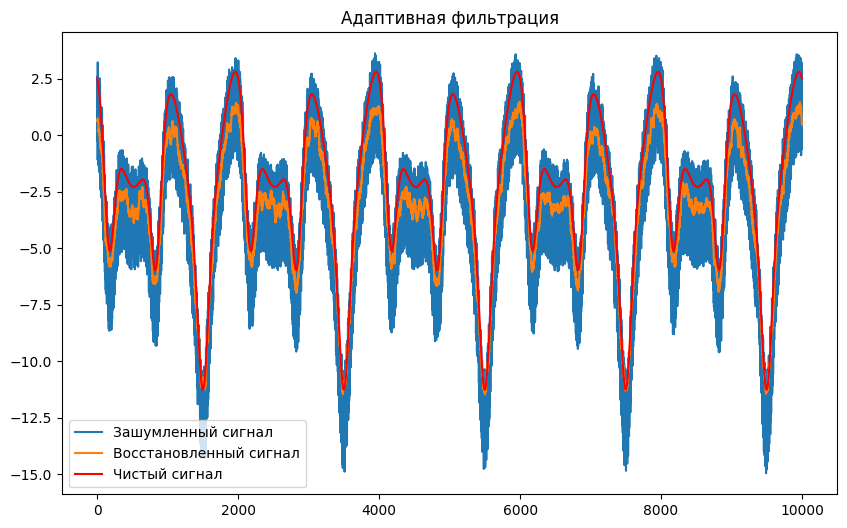

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Зашумленный сигнал')
plt.plot(filtered_signal, label='Восстановленный сигнал')
plt.plot(clean_signal, label='Чистый сигнал', c='r')
plt.legend()
plt.title('Адаптивная фильтрация')
plt.show()
